<a href="https://colab.research.google.com/github/109368018yumin/project/blob/main/Remove_RF_LR_ANN_0303_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Remove Outliers**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/dissertation/UIC_data/output/
df_all = pd.read_csv("NORMAL_BLOOD_PRESSURE2.csv") 

num_features = ['PTT','PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/dissertation/UIC_data/output


,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [4]:
df.describe()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000
mean,0.273917,0.196879,0.640121,0.441881,0.470796,0.169325,0.599063,114.441936,66.816257
std,0.042488,0.094932,0.127592,0.098849,0.089428,0.067952,0.130493,9.595277,5.005797
min,0.008000,0.008000,0.224000,0.033333,0.128000,-0.264000,0.052632,80.065000,60.020000
25%,0.248000,0.128000,0.544000,0.365079,0.400000,0.128000,0.506849,107.990000,62.716000
50%,0.272000,0.176000,0.608000,0.450704,0.456000,0.152000,0.609375,114.780000,65.842000
75%,0.296000,0.248000,0.720000,0.515625,0.528000,0.176000,0.683333,122.110000,69.798000
max,0.640000,0.936000,2.136000,0.750000,1.144000,1.624000,0.977273,129.970000,79.997000


In [5]:
ft = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
remove = set()
indices = set()
for x in ft:
  q25, q75 = np.percentile(df.loc[:,x], [25, 75])
  n=1.5  #1.5倍四分位距
  #IQR=Q3-Q1
  intra = q75 - q25
  # outlier = Q3 + n*IQR 
  max = q75 + intra *n
  # outlier = Q1 - n*IQR 
  min = q25 - intra *n
  
  transform_data1 = df.loc[df[x] < min, x].index
  transform_data2 = df.loc[df[x] > max, x].index
  remove = remove.union(transform_data1).union(transform_data2)
  


In [6]:
df.drop(remove, inplace=True)
df.to_csv('remove0303_1.csv')
#########remove outliers###########

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=c6047febc0c3d3c9a84f1d3f235dc9fb22c920da6cb61e70bc0a87125431339f
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_all = pd.read_csv("remove0303_1.csv") 

num_features = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [9]:
df.describe()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000
mean,0.273021,0.186819,0.614318,0.455204,0.459840,0.154478,0.608479,113.805195,66.989564
std,0.035669,0.082116,0.093731,0.091035,0.073621,0.032073,0.121172,9.503319,5.007147
min,0.184000,0.016000,0.360000,0.216981,0.224000,0.080000,0.302632,80.065000,60.020000
25%,0.248000,0.128000,0.544000,0.400000,0.400000,0.128000,0.533333,107.550000,62.892000
50%,0.272000,0.160000,0.592000,0.462366,0.448000,0.152000,0.625000,114.050000,66.135000
75%,0.296000,0.232000,0.680000,0.522388,0.512000,0.168000,0.684211,121.160000,69.994000
max,0.368000,0.424000,0.944000,0.718750,0.720000,0.240000,0.945946,129.970000,79.997000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


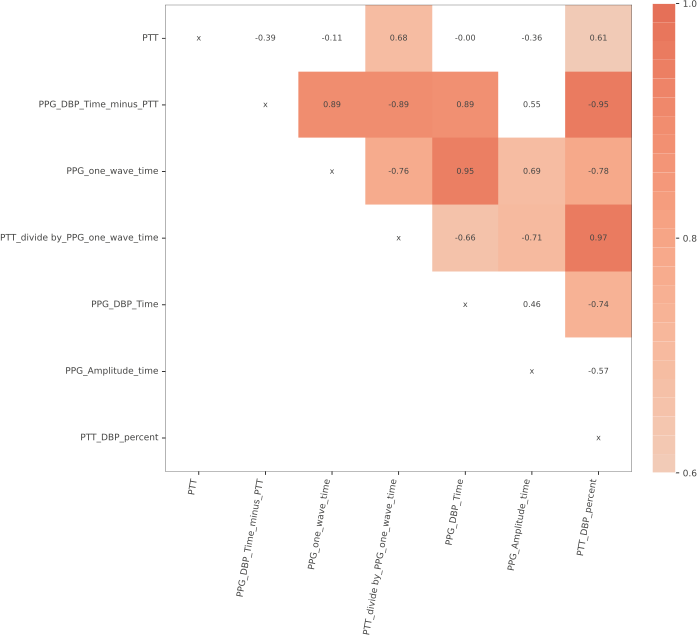

In [10]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
df_target.head()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
folds = KFold(n_splits=10, shuffle=True)

# resplit the data after processing
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3)

from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(x_train,figsize=(10,10))
viz


**RandomForest Regressor**

MAE SBP: 5.67110722974717 SD:7.9094563697687805 MAE DBP: 2.888945766612123 SD:4.036925335270232


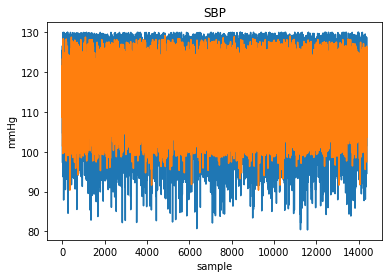

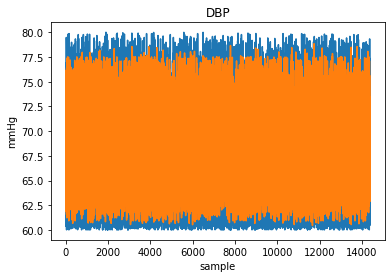

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**Linear Regression**

MAE SBP: 7.467060283313905 SD:9.260489865165306 MAE DBP: 4.014493619954455 SD:4.913514342426572


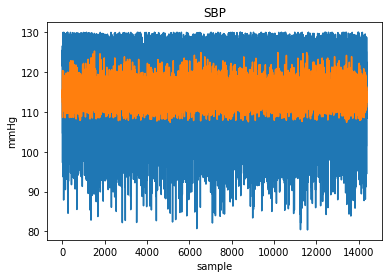

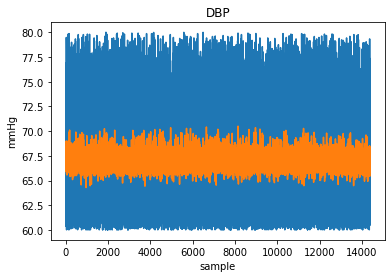

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(x_train, y_train)
prediction = linear.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**K_Fold**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
forest = RandomForestRegressor(n_estimators=100)
errors_sbp = []
errors_dbp = []

errors_sbp_std = []
errors_dbp_std = []

for i, (train_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    train_data, train_target = x_train.iloc[train_idx], y_train.iloc[train_idx]
    val_data, val_target = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    forest.fit(train_data, train_target) 
    predictions = forest.predict(val_data)

    error_sbp = mean_absolute_error(predictions[:,0], val_target["SBP"].values)
    error_dbp = mean_absolute_error(predictions[:,1], val_target["DBP"].values)

    error_sbp_std = np.std(predictions[:,0] - val_target["SBP"].values)
    error_dbp_std = np.std(predictions[:,1] - val_target["DBP"].values)

    print(f"Train fold {i} MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

    errors_sbp.append(error_sbp)
    errors_dbp.append(error_dbp)
    errors_sbp_std.append(error_sbp_std)
    errors_dbp_std.append(error_dbp_std)
    
print(f"Average MAE SBP: {np.mean(errors_sbp)} SD:{np.mean(errors_sbp_std)} MAE DBP: {np.mean(errors_dbp)} SD:{np.mean(errors_dbp_std)}")

Train fold 0 MAE SBP: 5.6404821321447765 SD:7.911696484072483 MAE DBP: 2.9772694002673297 SD:4.117944477850003
Train fold 1 MAE SBP: 5.764833155382256 SD:8.026965508754937 MAE DBP: 2.9657892506916297 SD:4.101702480762133
Train fold 2 MAE SBP: 5.599477267235743 SD:7.87495411771843 MAE DBP: 2.932975683205387 SD:4.079335394035824
Train fold 3 MAE SBP: 5.780897433693164 SD:8.098698508719481 MAE DBP: 2.926123716415896 SD:4.04990824227218
Train fold 4 MAE SBP: 5.897788315910966 SD:8.200265473608386 MAE DBP: 3.065424221881829 SD:4.249444010226908
Train fold 5 MAE SBP: 5.723980505106196 SD:7.956616091523111 MAE DBP: 2.9030678200707274 SD:4.040174974538412
Train fold 6 MAE SBP: 5.61994212940033 SD:7.757316592465381 MAE DBP: 2.8941665235303624 SD:4.017485640099541
Train fold 7 MAE SBP: 5.720914629509221 SD:8.01747483807746 MAE DBP: 2.9435970722258826 SD:4.080459086653921
Train fold 8 MAE SBP: 5.768409267747621 SD:8.039355583933588 MAE DBP: 2.887742969381516 SD:4.017980362110156
Train fold 9 MAE 

**Feature Importances**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error ,r2_score

#print('The mean absolute error is' , mean_absolute_error(predictions,y_test ))
#print('The mean squared error is' , mean_squared_error(predictions,y_test ))
#print('The R squared error is' , r2_score(predictions,y_test))

import pandas as pd
feature_imp = pd.Series(forest.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

#PPG_Amplitude_time                      波谷到波峰
#PPG_DBP_Time                            波峰到波谷
#PTT_DBP_percent                         NR-PTT  PTT在舒張期間所經過的時間比例
#PTT                                     波峰到重搏波
#PPG_DBP_Time_divide_PTT                 重搏波到波谷
#PPG_one_wave_time                       波峰到波峰
#PTT_divide by_PPG_one_wave_time         ptt/one wave time

PPG_Amplitude_time                 0.232323
PPG_one_wave_time                  0.192154
PTT_divide by_PPG_one_wave_time    0.186931
PPG_DBP_Time                       0.142559
PTT_DBP_percent                    0.102686
PPG_DBP_Time_minus_PTT             0.082614
PTT                                0.060733
dtype: float64

ANN

In [15]:
import pandas as pd
from google.colab import drive 
import numpy as np 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/
#df_all = pd.read_csv("org_train_normal_new.csv") 
#num_features = ['cardiac_period', 'SUT', 'DT', 'DW_10', 'DW_25', 'DW_33', 'DW_50', 'DW_66','DW_75', 'SW_10 + DW_10', 'SW_10/DW_10', 'SW_25 + DW_25', 'SW_25/DW_25', 'SW_33 + DW_33', 'SW_33/DW_33','SW_50 + DW_50', 'SW_50 / DW_50', 'SW_66 + DW_66', 'SW_66 / DW_66','SW_75 + DW_75', 'SW_75 / DW_75','area','area_s','area_d']

#正常特徵
num_features = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']

#高血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SW_50 + DW_50','DW_33','SW_33/DW_33','SW_10/DW_10']

#低血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SUT','area','SW_10/DW_10','SW_25/DW_25']

#混和特徵
#num_features = ['cardiac_period','SUT', 'DT','DW_50','SW_75 / DW_75','area_d','DW_75', 'SW_10/DW_10']

target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [16]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
df_target.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SBP,DBP
0,118.35,66.135
1,119.57,66.135
2,122.35,67.503
3,122.75,67.600
4,121.62,67.063


In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=3)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(X_train)
x_test=sc_X.transform(X_test)

In [19]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=5)

In [20]:
print(len(x_train))
print(len(x_test))
print(len(x_val))

33562
7193
7192


In [21]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
callbacks_list = [earlystop]

def baseline_model():
	# create model
  from keras import optimizers
  model = Sequential()
  model.add(Dense(128, input_dim=7, kernel_initializer='normal', activation='relu'))
  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(2, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Epoch 1/500
263/263 [==============================] - 2s 5ms/step - loss: 2198.4175 - val_loss: 79.1180
Epoch 2/500
263/263 [==============================] - 1s 4ms/step - loss: 83.6754 - val_loss: 58.6918
Epoch 3/500
263/263 [==============================] - 1s 4ms/step - loss: 77.8614 - val_loss: 56.1912
Epoch 4/500
263/263 [==============================] - 1s 5ms/step - loss: 77.3828 - val_loss: 55.8454
Epoch 5/500
263/263 [==============================] - 1s 5ms/step - loss: 76.9079 - val_loss: 54.5625
Epoch 6/500
263/263 [==============================] - 1s 5ms/step - loss: 76.4221 - val_loss: 55.2671
Epoch 7/500
263/263 [==============================] - 1s 5ms/step - loss: 75.5956 - val_loss: 54.0689
Epoch 8/500
263/263 [==============================] - 1s 5ms/step - loss: 76.0835 - val_loss: 54.4771
Epoch 9/500
263/263 [==============================] - 1s 5ms/step - loss: 75.2990 - val_loss: 54.0826
Epoch 10/500
263/263 [==============================] - 1s 5ms/step - l

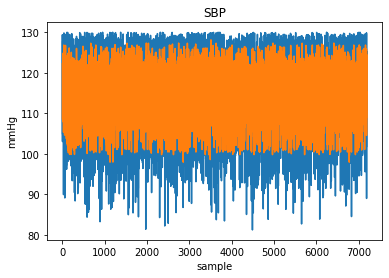

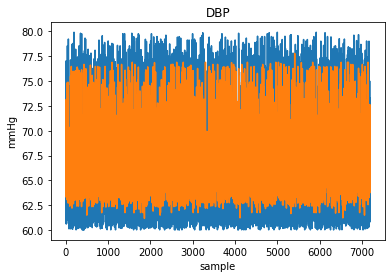

In [22]:
from sklearn.metrics import mean_absolute_error
estimator = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=128, verbose=1)
history = estimator.fit(x_train, y_train, validation_data=(x_val,y_val),callbacks=callbacks_list)
prediction = estimator.predict(x_test)

error_sbp = prediction[:,0] - y_test["SBP"].values
error_dbp = prediction[:,1] - y_test["DBP"].values

mae_error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
mae_error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(abs(prediction[:,0] - y_test["SBP"].values))
error_dbp_std = np.std(abs(prediction[:,1] - y_test["DBP"].values))

print(f"MAE SBP: {mae_error_sbp} SD:{error_sbp_std} MAE DBP: {mae_error_dbp} SD:{error_dbp_std}")

sbp = np.vstack(y_test["SBP"])
dbp = np.vstack(y_test["DBP"])
prd_sbp = np.vstack(prediction[:,0])
prd_dbp = np.vstack(prediction[:,1])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(sbp)
plt.plot(prd_sbp)

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(dbp)
plt.plot(prd_dbp)


#np.savetxt('ANN_nor_24_9w_result.csv',np.column_stack((sbp,dbp,prd_sbp,prd_dbp,error_sbp,error_dbp)),delimiter=',')

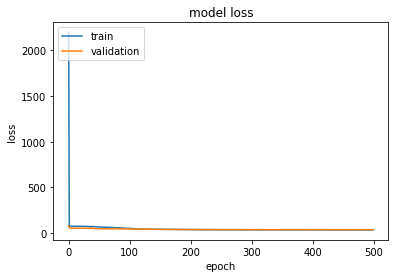

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()